In [16]:
%config Completer.use_jedi = False
import pandas as pd
import json
import re
import plotly.graph_objs as go
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [17]:
def CustomParser(data):
    import json
    j1 = json.loads(data)
    return j1

# pd.read_csv("movies_dataset.csv", converters={'belongs_to_collection':CustomParser},)
df = pd.read_csv("movies_dataset.csv")


In [18]:
# df.sample(frac=0.8).to_csv("train_validation.csv")
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
train.to_csv("train_test.csv")
test.to_csv("evaluation.csv")

In [150]:
import ast
def process_json(x):
    return pd.json_normalize(ast.literal_eval(x))
genres = df.genres.apply(process_json)
genres[0]
# pd.get_dummies(genres[4], drop_first=False)

,id,name
0,18,Drama
1,10749,Romance


In [20]:
csvfile = pd.read_csv("train_test.csv")
display(csvfile)

,Unnamed: 0,id,belongs_to_collection,budget,genres,homepage,original_language,original_title,overview,vote_average,...,release_date,runtime,spoken_languages,status,tagline,title,keywords,cast,crew,revenue
0,3622,3623,"{'id': 35792, 'name': 'Nanny McPhee Collection'}",25000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",NaN,en,Nanny McPhee,Widower Cedric Brown hires Nanny McPhee to car...,6.6,...,21/10/2005,97.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You'll learn to love her. Warts and all.,Nanny McPhee,"[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'gender': 1, 'id': 7056, 'known_for_departme...","[{'gender': 2, 'id': 2236, 'known_for_departme...",123276807
1,4085,4086,NaN,0,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://www.miramax.com/movie/ella-enchanted/,en,Ella Enchanted,Ella lives in a magical world in which each ch...,6.4,...,09/04/2004,96.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Get enchanted,Ella Enchanted,"[{'id': 603, 'name': 'elves'}, {'id': 818, 'na...","[{'gender': 1, 'id': 1813, 'known_for_departme...","[{'gender': 1, 'id': 8383, 'known_for_departme...",0
2,3829,3830,NaN,30000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,en,Legends of the Fall,An epic tale of three brothers and their fathe...,7.4,...,16/12/1994,133.0,"[{'english_name': 'Cornish', 'iso_639_1': 'kw'...",Released,After the Fall from Innocence the Legend begins.,Legends of the Fall,"[{'id': 380, 'name': 'sibling relationship'}, ...","[{'gender': 2, 'id': 287, 'known_for_departmen...","[{'gender': 2, 'id': 1729, 'known_for_departme...",160638883
3,2993,2994,NaN,14000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,en,Head Over Heels,Ordinary single girl Amanda Pierce unexpectedl...,5.7,...,02/02/2001,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Unleash your inner model.,Head Over Heels,"[{'id': 1253, 'name': 'roommate'}, {'id': 1568...","[{'gender': 1, 'id': 2140, 'known_for_departme...","[{'gender': 2, 'id': 7398, 'known_for_departme...",13127022
4,576,577,NaN,0,"[{'id': 27, 'name': 'Horror'}]",http://www.uninvitedmovie.com,en,The Uninvited,Anna returns home after spending time in a psy...,6.5,...,30/01/2009,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Can you believe what you see?,The Uninvited,"[{'id': 9714, 'name': 'remake'}, {'id': 157213...","[{'gender': 1, 'id': 70456, 'known_for_departm...","[{'gender': 1, 'id': 495, 'known_for_departmen...",41624046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4522,4602,4603,NaN,4600000,"[{'id': 36, 'name': 'History'}, {'id': 28, 'na...",NaN,hi,भाग मिल्खा भाग,"The true story of the ""Flying Sikh"" world cham...",7.6,...,12/07/2013,186.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,Now you will see his Real Story.,Bhaag Milkha Bhaag,"[{'id': 1721, 'name': 'fight'}, {'id': 2274, '...","[{'gender': 2, 'id': 78916, 'known_for_departm...","[{'gender': 0, 'id': 53671, 'known_for_departm...",25000000
4523,452,453,"{'id': 635362, 'name': 'The Punisher Collection'}",20500000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://punisherwarzonemovie.com,en,Punisher: War Zone,Waging his one-man war on the world of organiz...,5.7,...,05/12/2008,102.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,Vengeance has a name,Punisher: War Zone,"[{'id': 1812, 'name': 'fbi'}, {'id': 10525, 'n...","[{'gender': 2, 'id': 56614, 'known_for_departm...","[{'gender': 1, 'id': 869, 'known_for_departmen...",10089373
4524,157,158,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 37, 'name...",http://meekscutoff.com/,en,Meek's Cutoff,"Set in 1845, this drama follows a group of set...",6.5,...,05/09/2010,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The Road to Civilisation is Not Always Civilised,Meek's Cutoff,"[{'id': 1321, 'name': 'gold'}, {'id': 1897, 'n...","[{'gender': 1, 'id': 1812, 'known_for_departme...",

Text(0.5, 1.0, 'vote average vs vote count')

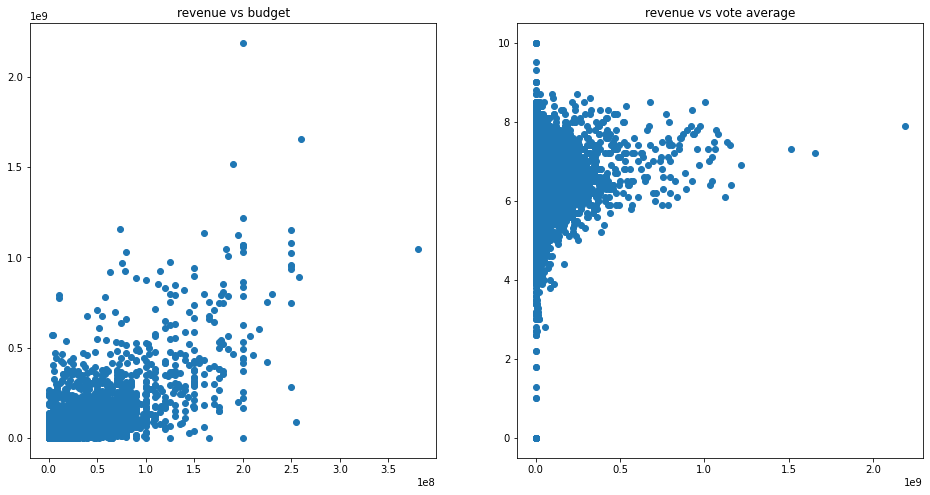

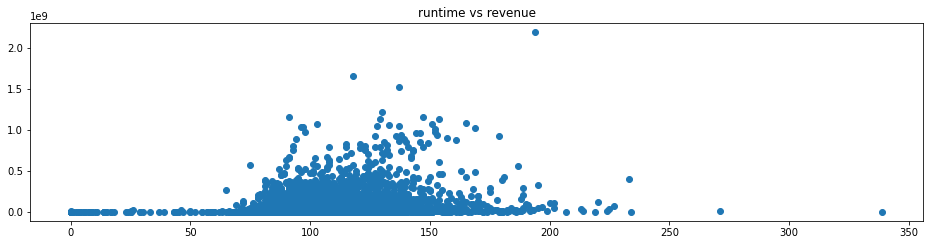

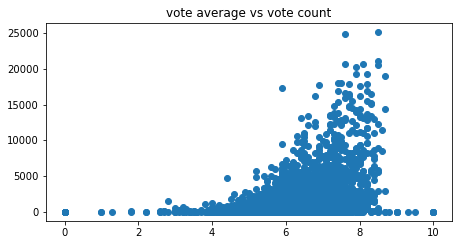

In [21]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(df['budget'], df['revenue'])
plt.title('revenue vs budget')
plt.subplot(1, 2, 2)
plt.scatter(df['revenue'], df['vote_average'])
plt.title('revenue vs vote average')
plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
plt.scatter(df['runtime'], df['revenue'])
plt.title('runtime vs revenue')
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 2)
plt.scatter(df['vote_average'], df['vote_count'])
plt.title('vote average vs vote count')

In [22]:
languages = {}
for language in df['original_language']:
    if language not in languages:
        languages[language] = 1
    else:
        languages[language] += 1
print(languages)

{'es': 66, 'en': 4919, 'ja': 59, 'fr': 141, 'pt': 8, 'ru': 67, 'ta': 28, 'tr': 9, 'hi': 99, 'it': 35, 'fa': 5, 'ml': 15, 'de': 30, 'ar': 1, 'ur': 6, 'cn': 28, 'ko': 24, 'ro': 3, 'th': 3, 'zh': 31, 'no': 4, 'tl': 4, 'id': 2, 'sv': 9, 'te': 8, 'he': 5, 'nl': 8, 'fi': 7, 'pl': 4, 'sr': 1, 'da': 7, 'pa': 4, 'mr': 3, 'hu': 2, 'bn': 3, 'nb': 1, 'hr': 1, 'kn': 2, 'mi': 1, 'ca': 1, 'vi': 1, 'is': 1, 'cs': 1, 'uk': 1, 'bm': 1}


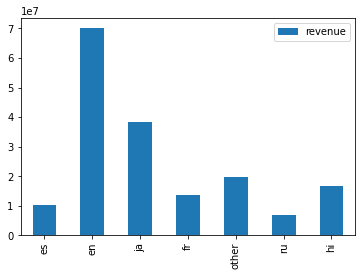

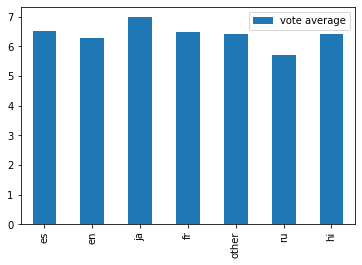

In [23]:
valid_language = ['es', 'en', 'ja', 'fr', 'ru', 'hi', 'other']
for language in df['original_language']:
    if language not in valid_language:
        df['original_language'] = df['original_language'].replace([language], 'other')
languages = {}
language_rev = {}
language_vote = {}
for i in range(len(df['original_language'])):
    if df['original_language'][i] not in languages:
        languages[df['original_language'][i]] = 1
        language_rev[df['original_language'][i]] = df['revenue'][i]
        language_vote[df['original_language'][i]] = df['vote_average'][i]
    else:
        languages[df['original_language'][i]] += 1
        language_rev[df['original_language'][i]] += df['revenue'][i]
        language_vote[df['original_language'][i]] += df['vote_average'][i]
language = []
vote_ave = []
rev_ave = []
for lan in languages:
    if lan not in language:
        language.append(lan)
        rev_ave.append(language_rev[lan]/languages[lan])
        vote_ave.append(language_vote[lan]/languages[lan])

df_bar = pd.DataFrame({'revenue': rev_ave}, index=language)
ax = df_bar.plot.bar()
df_bar = pd.DataFrame({'vote average': vote_ave}, index=language)
ax = df_bar.plot.bar()

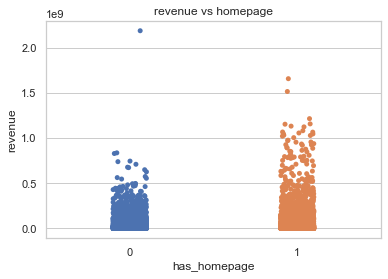

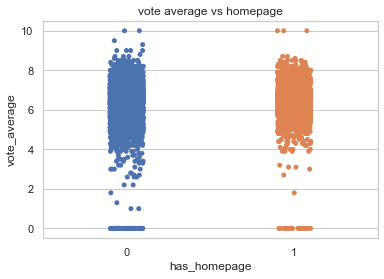

In [56]:
df['has_homepage'] = 0
df.loc[df['homepage'].isnull() == False, 'has_homepage'] = 1 
sns.stripplot(x='has_homepage', y='revenue', data=df)
plt.title('revenue vs homepage')
plt.show()
sns.stripplot(x='has_homepage', y='vote_average', data=df)
plt.title('vote average vs homepage')
plt.show()

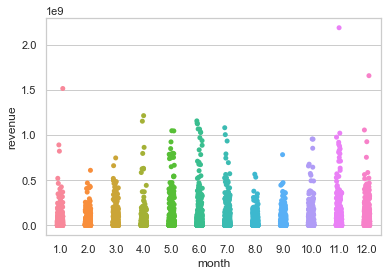

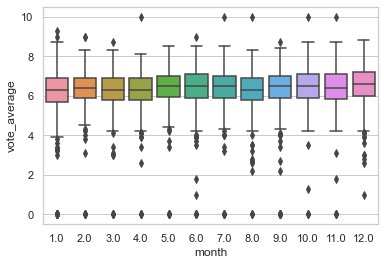

In [48]:
df['release_date'] = pd.to_datetime(df['release_date'])

df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
# df['release_date']
# df['month']
# df1 = df.groupby(df['release_date'].dt.to_period('M')).sum()
# df1 = df1.resample('M').asfreq().fillna(0)
# df1.plot(kind='bar')
# sns.set(style='whitegrid')
# Months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# sns.barplot(x='LastContactMonth', y='revenue', data=df['month', order=Months, palette='Set3')
# plt.xticks(rotation=-75)
# plt.show()
fig, ax = plt.subplots()
# fig.set_size_inches((12,4))
sns.stripplot(x='month',y='revenue',data=df,ax=ax)
plt.show()
fig, ax = plt.subplots()
# fig.set_size_inches((12,4))
sns.boxplot(x='month',y='vote_average',data=df,ax=ax)
plt.show()

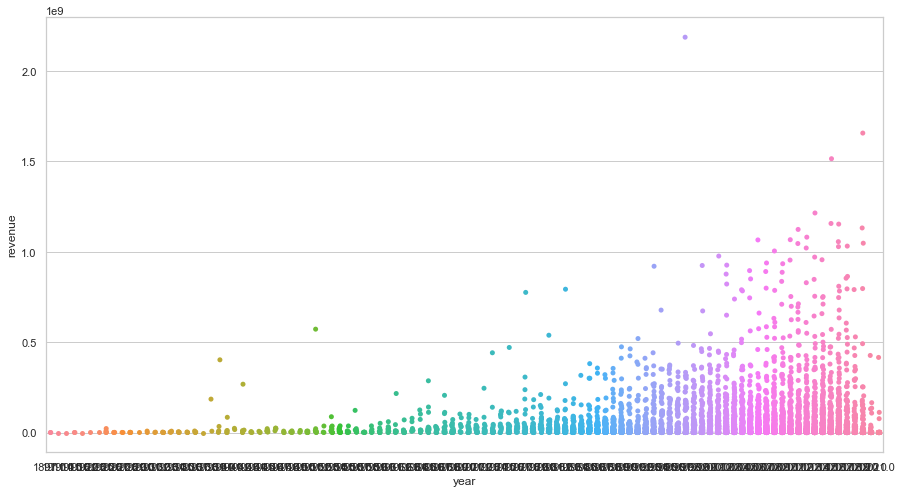

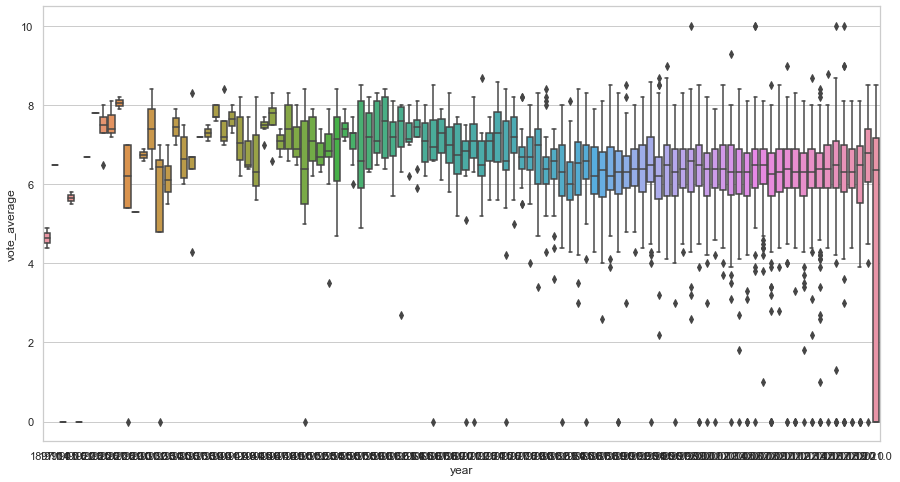

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches((15,8))
sns.stripplot(x='year',y='revenue',data=df,ax=ax)
plt.show()
fig, ax = plt.subplots()
fig.set_size_inches((15,8))
sns.boxplot(x='year',y='vote_average',data=df,ax=ax)
plt.show()

<ipython-input-146-6ef1f7e083aa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language_len'][i] = df['spoken_languages'][i].count('}')


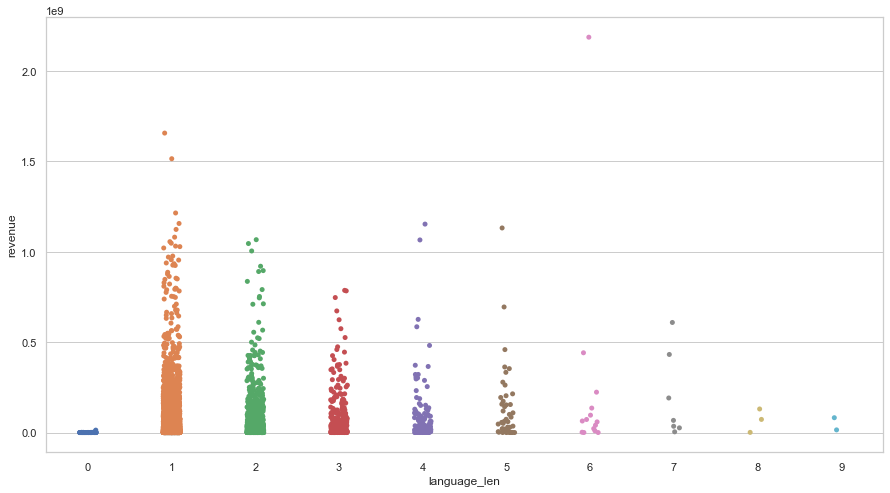

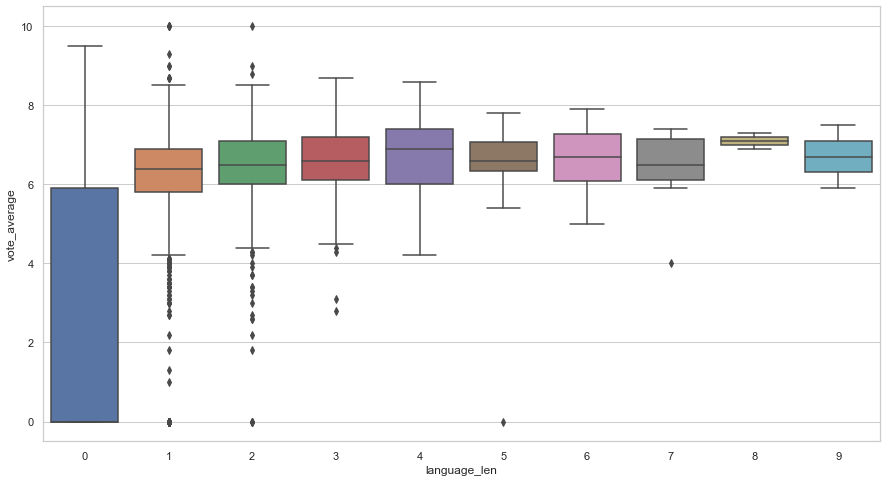

In [146]:
# print(df['spoken_languages'][0])
# len(df['spoken_languages'][0])
# [d['english_name'] for d in (df['spoken_languages'][0])]
df['spoken_languages'][0].count('}')
df['language_len'] = 0
for i in range(len(df['spoken_languages'])):
    df['language_len'][i] = df['spoken_languages'][i].count('}')
#     print(count)
# print(df['language_len'])
#     df['language_len'] = count
# df['len_language'] = df['release_date'].count('}')

fig, ax = plt.subplots()
fig.set_size_inches((15,8))
sns.stripplot(x='language_len',y='revenue',data=df,ax=ax)
plt.show()
fig, ax = plt.subplots()
fig.set_size_inches((15,8))
sns.boxplot(x='language_len',y='vote_average',data=df,ax=ax)
plt.show()

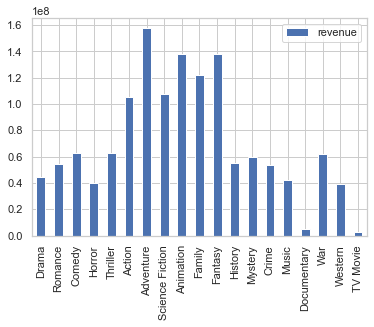

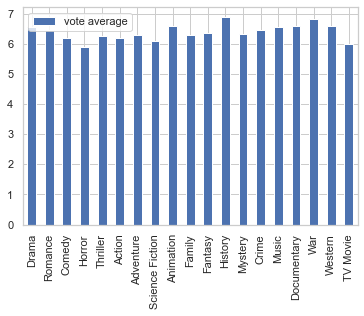

In [193]:
category = [d['name'] for i in range(genres.shape[0]) for d in ast.literal_eval(df.genres[i])]
categories = {}
categories_rev = {}
cate_vote = {}
genres[0]

for i in range(genres.shape[0]):
#     print(ast.literal_eval(df.genres[i])["name"])
    for d in ast.literal_eval(df.genres[i]):
#         categories[d['name']] += df['revenue'][i]
#         print(d['name'])
#         print(df['revenue'][i])
        if d['name'] in categories_rev:
            categories_rev[d['name']] += df['revenue'][i]
            cate_vote[d['name']] += df['vote_average'][i]
            categories[d['name']] += 1
        else:
            categories_rev[d['name']] = df['revenue'][i]
            cate_vote[d['name']] = df['vote_average'][i]
            categories[d['name']] = 1
# print(categories_rev)
category_ = []
vote_ave = []
rev_ave = []
for cate in category:
    if cate not in category_:
        category_.append(cate)
        rev_ave.append(categories_rev[cate]/categories[cate])
        vote_ave.append(cate_vote[cate]/categories[cate])
# rev_ave
df_bar = pd.DataFrame({'revenue': rev_ave}, index=category_)
ax = df_bar.plot.bar()
df_bar = pd.DataFrame({'vote average': vote_ave}, index=category_)
ax = df_bar.plot.bar()

In [98]:
def clean_data(df, to_remove):
    df.drop(columns=to_remove, inplace=True)
    df["has_budget"] = np.where(df["budget"] == 0, 0, 1)
    budget_average = int(df.budget.sum() / (df.budget != 0).sum())
    df['budget'] = df['budget'].replace([0], budget_average)
    df["spoken_languages"] = df["spoken_languages"].apply(lambda x: len(x))
    df = pd.get_dummies(df, dummy_na=True, columns=["original_language"], drop_first=True)
    create_dummy(df, "cast", "name", 30)
    create_dummy(df, "crew", "name", 30)
    create_dummy(df, "genres", "name")
    df.drop(columns=["genres", "crew", "cast"], inplace=True)
    return df.dropna()


In [101]:
def create_dummy(df, col_name, dict_key, threshold=0):
    parsed_col = df[col_name].apply(lambda x: [d[dict_key] for d in (ast.literal_eval(x))] if pd.notna(x) else [])
    dummies = []
    for lst in parsed_col:
        dummies += lst
    if threshold <= 0:
        dummies = set(dummies)
    else:
        c = Counter(dummies)
        dummies = {name for name, val in c.items() if val > threshold}
    for dummy in dummies:
        df[dummy] = parsed_col.apply(lambda x: 1 if dummy in x else 0)

Text(0.5, 1.0, 'revenue vs budget')

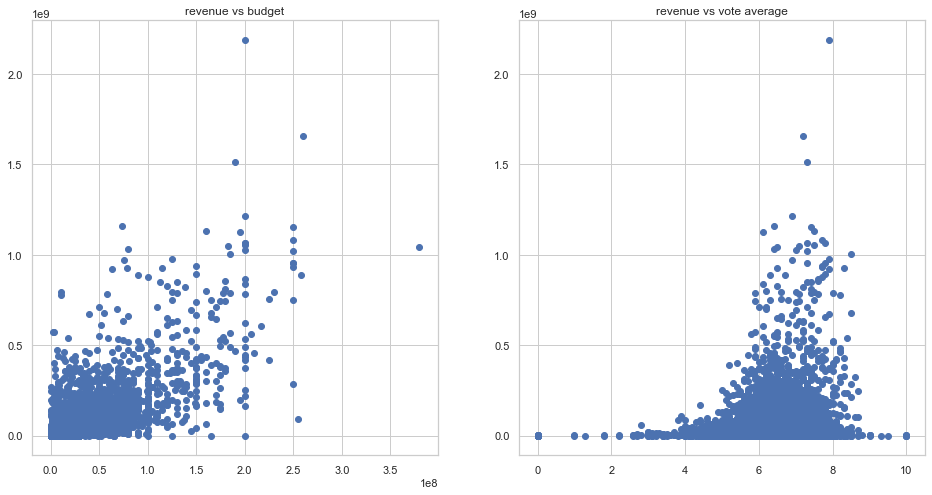

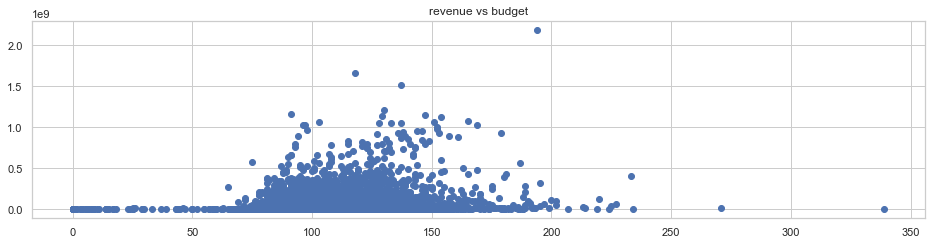

In [100]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(df['budget'], df['revenue'])
plt.title('revenue vs budget')
plt.subplot(1, 2, 2)
plt.scatter(df['vote_average'], df['revenue'])
plt.title('revenue vs vote average')
plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
plt.scatter(df['runtime'], df['revenue'])
plt.title('revenue vs budget')

In [152]:
pd.get_dummies([d["name"] for d in ast.literal_eval(df.genres[0])])
categories = {d["name"] for i in range(genres.shape[0]) for d in ast.literal_eval(df.genres[i])}
relevant_features = df.drop(columns=['id', 'belongs_to_collection', 
       'homepage', 'original_title', 'overview',
        'tagline', 'title', 'keywords'])
# relevant_features = (relevant_features.runtime > 0) & (relevant_features.status == "Released") 
relevant_features

0       True
1       True
2       True
3       True
4       True
        ... 
5654    True
5655    True
5656    True
5657    True
5658    True
Length: 5659, dtype: bool

Text(0.5, 1.0, 'revenue vs vote average')

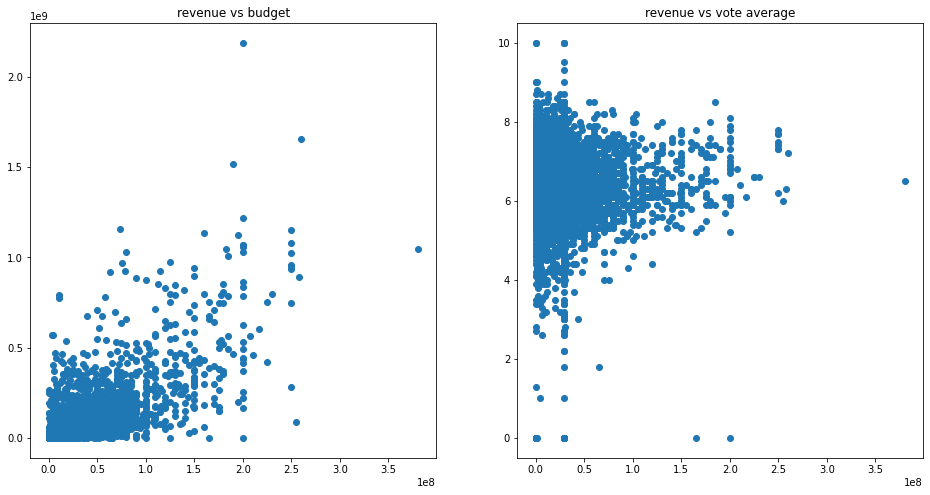

In [138]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(relevant_features['budget'], relevant_features['revenue'])
plt.title('revenue vs budget')
plt.subplot(1, 2, 2)
plt.scatter(df['budget'], df['vote_average'])
plt.title('revenue vs vote average')

In [115]:

# relevant_features
# (relevant_features.budget == 0).sum() / relevant_features.shape[0]
# relevant_features = relevant_features.loc[relevant_features.status=="Released", :]
relevant_features.release_date = pd.to_datetime(relevant_features.release_date)
valid_data = (relevant_features.runtime > 0) & (relevant_features.status == "Released") 
numeric_data = relevant_features.loc[valid_data, ["budget", "runtime", "vote_count", "revenue"]]
train, test = train_test_split(numeric_data, test_size=0.2)
train_x = train.drop(columns=["revenue"]).to_numpy()
train_y = train.revenue.to_numpy()
test_y = test.revenue.to_numpy()
test_x = test.drop(columns=["revenue"]).to_numpy()
mdl = LinearRegression().fit(train_x, train_y)

mean_squared_error(train_y, mdl.predict(train_x))

4683056940841828.0

In [116]:
px.histogram(relevant_features, x="revenue")
(relevant_features.runtime < 10).sum()
# (relevant_features.revenue ==0).sum()
# px.scatter(data_frame=relevant_features.loc[relevant_features.budget != 0,:], x="budget", y="revenue
((relevant_features.budget != 0) & (relevant_features.revenue == 0)).sum()
relevant_features.loc[(relevant_features.budget != 0) & (relevant_features.revenue == 0),:]

,budget,genres,original_language,vote_average,vote_count,production_companies,production_countries,release_date,runtime,spoken_languages,status,cast,crew,revenue
110,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,6.1,492,"[{'id': 73953, 'name': 'ELC Productions Ltd.',...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2005-06-04,103.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 1, 'id': 69597, 'known_for_departm...","[{'gender': 1, 'id': 1588, 'known_for_departme...",0
124,23153,"[{'id': 16, 'name': 'Animation'}]",en,6.0,22,"[{'id': 3166, 'name': 'Walt Disney Productions...","[{'iso_3166_1': 'US', 'name': 'United States o...",1935-12-04,8.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 2, 'id': 31771, 'known_for_departm...","[{'gender': 2, 'id': 2106, 'known_for_departme...",0
190,7500,"[{'id': 99, 'name': 'Documentary'}]",en,0.0,0,[],[],2021-09-03,66.0,[],Released,[],"[{'gender': 0, 'id': 1506307, 'known_for_depar...",0
421,12000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",en,6.9,1165,"[{'id': 923, 'name': 'Legendary Pictures', 'or...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-10-26,82.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 1, 'id': 10690, 'known_for_departm...","[{'gender': 2, 'id': 3276, 'known_for_departme...",0
595,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 28, 'nam...",cn,6.6,227,"[{'id': 71988, 'name': 'Hong Kong Film Directo...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",1992-01-15,104.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"[{'gender': 2, 'id': 18897, 'known_for_departm...","[{'gender': 2, 'id': 21904, 'known_for_departm...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5441,810000,"[{'id': 27, 'name': 'Horror'}]",en,7.3,811,"[{'id': 632, 'name': 'British Lion Films', 'or...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1973-01-12,94.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 2, 'id': 39188, 'known_for_departm...","[{'gender': 1, 'id': 750, 'known_for_departmen...",0
5458,3600000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",en,5.2,524,"[{'id': 109907, 'name': 'Potato Eater Producti...","[{'iso_3166_1': 'US', 'name': 'United States o...",2019-06-20,97.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 2, 'id': 16483, 'known_for_departm...","[{'gender': 2, 'id': 10421, 'known_for_departm...",0
5488,40000000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",en,5.3,196,"[{'id': 42221, 'name': 'Munich Film Partners &...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-08,107.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 1, 'id': 326, 'known_for_departmen...","[{'gender': 2, 'id': 853, 'known_for_departmen...",0
5497,6000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,4.7,7,"[{'id': 38555, 'name': 'Cinema 7 Film Group', ...","[{'iso_3166_1': 'GR', 'name': 'Greece'}, {'iso...",2005-11-13,94.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 2, 'id': 8654, 'known_for_departme...","[{'gender': 2, 'id': 469, 'known_for_departmen...",0


In [117]:
relevant_features

,budget,genres,original_language,vote_average,vote_count,production_companies,production_countries,release_date,runtime,spoken_languages,status,cast,crew,revenue
0,2000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",es,7.2,304,"[{'id': 84803, 'name': 'Aviacsa', 'origin_coun...","[{'iso_3166_1': 'MX', 'name': 'Mexico'}]",1992-04-16,105.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 2, 'id': 27643, 'known_for_departm...","[{'gender': 2, 'id': 4185, 'known_for_departme...",21665468
1,7000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,3.5,54,"[{'id': 13549, 'name': 'Golan-Globus Productio...","[{'iso_3166_1': 'US', 'name': 'United States o...",1984-08-31,105.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 1, 'id': 37995, 'known_for_departm...","[{'gender': 2, 'id': 1053, 'known_for_departme...",8914881
2,0,"[{'id': 35, 'name': 'Comedy'}]",en,5.8,50,"[{'id': 98870, 'name': 'Gorean Films', 'origin...","[{'iso_3166_1': 'AU', 'name': 'Australia'}]",2017-09-03,96.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 2, 'id': 1525047, 'known_for_depar...","[{'gender': 1, 'id': 12203, 'known_for_departm...",380806
3,0,"[{'id': 27, 'name': 'Horror'}]",en,5.2,84,"[{'id': 1898, 'name': 'Screen Ireland', 'origi...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2011-06-09,85.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 1, 'id': 33397, 'known_for_departm...","[{'gender': 2, 'id': 4868, 'known_for_departme...",3838
4,100000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",en,4.9,754,"[{'id': 69581, 'name': 'Tremendum Pictures', '...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-10-07,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 1, 'id': 1357480, 'known_for_depar...","[{'gender': 2, 'id': 84348, 'known_for_departm...",42664410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5654,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",es,6.5,31,"[{'id': 2316, 'name': 'Compañía Iberoamericana...","[{'iso_3166_1': 'ES', 'name': 'Spain'}]",1987-09-04,106.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,"[{'gender': 1, 'id': 37585, 'known_for_departm...","[{'gender': 0, 'id': 16876, 'known_for_departm...",312010
5655,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,6.3,5268,"[{'id': 923, 'name': 'Legendary Pictures', 'or...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2016-05-25,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 2, 'id': 77700, 'known_for_departm...","[{'gender': 0, 'id': 282, 'known_for_departmen...",433677183
5656,2500000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,7.2,1324,"[{'id': 43, 'name': 'Fox Searchlight Pictures'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-07-28,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 2, 'id': 5367, 'known_for_departme...","[{'gender': 1, 'id': 2952, 'known_for_departme...",26781723
5657,53000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,7.6,4251,"[{'id': 11231, 'name': 'Fox Animation Studios'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-20,94.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 1, 'id': 5344, 'known_for_departme...","[{'gender': 2, 'id': 671, 'known_for_departmen...",139804348


In [118]:
buget_average = int(relevant_features.budget.sum()/(relevant_features.budget != 0).sum())
buget_average
relevant_features['budget'] = df['budget'].replace([0], buget_average) 
relevant_features

,budget,genres,original_language,vote_average,vote_count,production_companies,production_countries,release_date,runtime,spoken_languages,status,cast,crew,revenue
0,2000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",es,7.2,304,"[{'id': 84803, 'name': 'Aviacsa', 'origin_coun...","[{'iso_3166_1': 'MX', 'name': 'Mexico'}]",1992-04-16,105.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 2, 'id': 27643, 'known_for_departm...","[{'gender': 2, 'id': 4185, 'known_for_departme...",21665468
1,7000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,3.5,54,"[{'id': 13549, 'name': 'Golan-Globus Productio...","[{'iso_3166_1': 'US', 'name': 'United States o...",1984-08-31,105.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 1, 'id': 37995, 'known_for_departm...","[{'gender': 2, 'id': 1053, 'known_for_departme...",8914881
2,29535658,"[{'id': 35, 'name': 'Comedy'}]",en,5.8,50,"[{'id': 98870, 'name': 'Gorean Films', 'origin...","[{'iso_3166_1': 'AU', 'name': 'Australia'}]",2017-09-03,96.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 2, 'id': 1525047, 'known_for_depar...","[{'gender': 1, 'id': 12203, 'known_for_departm...",380806
3,29535658,"[{'id': 27, 'name': 'Horror'}]",en,5.2,84,"[{'id': 1898, 'name': 'Screen Ireland', 'origi...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2011-06-09,85.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 1, 'id': 33397, 'known_for_departm...","[{'gender': 2, 'id': 4868, 'known_for_departme...",3838
4,100000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",en,4.9,754,"[{'id': 69581, 'name': 'Tremendum Pictures', '...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-10-07,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 1, 'id': 1357480, 'known_for_depar...","[{'gender': 2, 'id': 84348, 'known_for_departm...",42664410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5654,29535658,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",es,6.5,31,"[{'id': 2316, 'name': 'Compañía Iberoamericana...","[{'iso_3166_1': 'ES', 'name': 'Spain'}]",1987-09-04,106.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,"[{'gender': 1, 'id': 37585, 'known_for_departm...","[{'gender': 0, 'id': 16876, 'known_for_departm...",312010
5655,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,6.3,5268,"[{'id': 923, 'name': 'Legendary Pictures', 'or...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2016-05-25,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 2, 'id': 77700, 'known_for_departm...","[{'gender': 0, 'id': 282, 'known_for_departmen...",433677183
5656,2500000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,7.2,1324,"[{'id': 43, 'name': 'Fox Searchlight Pictures'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-07-28,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 2, 'id': 5367, 'known_for_departme...","[{'gender': 1, 'id': 2952, 'known_for_departme...",26781723
5657,53000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,7.6,4251,"[{'id': 11231, 'name': 'Fox Animation Studios'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-20,94.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"[{'gender': 1, 'id': 5344, 'known_for_departme...","[{'gender': 2, 'id': 671, 'known_for_departmen...",139804348


In [120]:
relevant_features.release_date = pd.to_datetime(relevant_features.release_date)
valid_data = (relevant_features.runtime > 0) & (relevant_features.status == "Released") 
numeric_data = relevant_features.loc[valid_data, ["budget", "runtime", "vote_count", "revenue"]]
train, test = train_test_split(numeric_data, test_size=0.2)
train_x = train.drop(columns=["revenue"]).to_numpy()
train_y = train.revenue.to_numpy()
test_y = test.revenue.to_numpy()
test_x = test.drop(columns=["revenue"]).to_numpy()
mdl = LinearRegression().fit(train_x, train_y)

mean_squared_error(train_y, mdl.predict(train_x))

5436136362480956.0

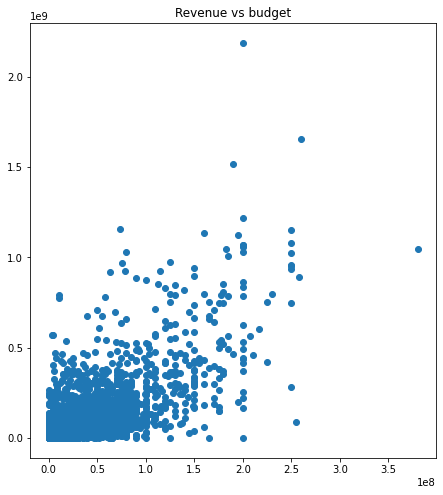

In [126]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(df['budget'], df['revenue'])
plt.title('Revenue vs budget')